In [11]:
import pandas as pd
train_data= pd.read_csv("C:\\Users\\Administrator\\Desktop\\STA 141C\\cleaned_train.csv")
train_data.head()





,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,HasMisc,FireplaceQu_ord,PoolHighOutlier,Alley_Grvl,Alley_Pave,HasFence,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,False,False,0,False,False,False,False
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,3,0,False,False,0,False,False,False,False
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,3,0,False,False,0,False,False,False,False
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,0,4,0,False,False,0,False,False,False,False
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,3,0,False,False,0,False,False,False,False


In [3]:

train_df = pd.DataFrame(train_data)
df = train_df.copy()
df.columns


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageCars', 'GarageArea',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice', 'BsmtQual_ord', 'BsmtCond_ord',
       'BsmtExposure_

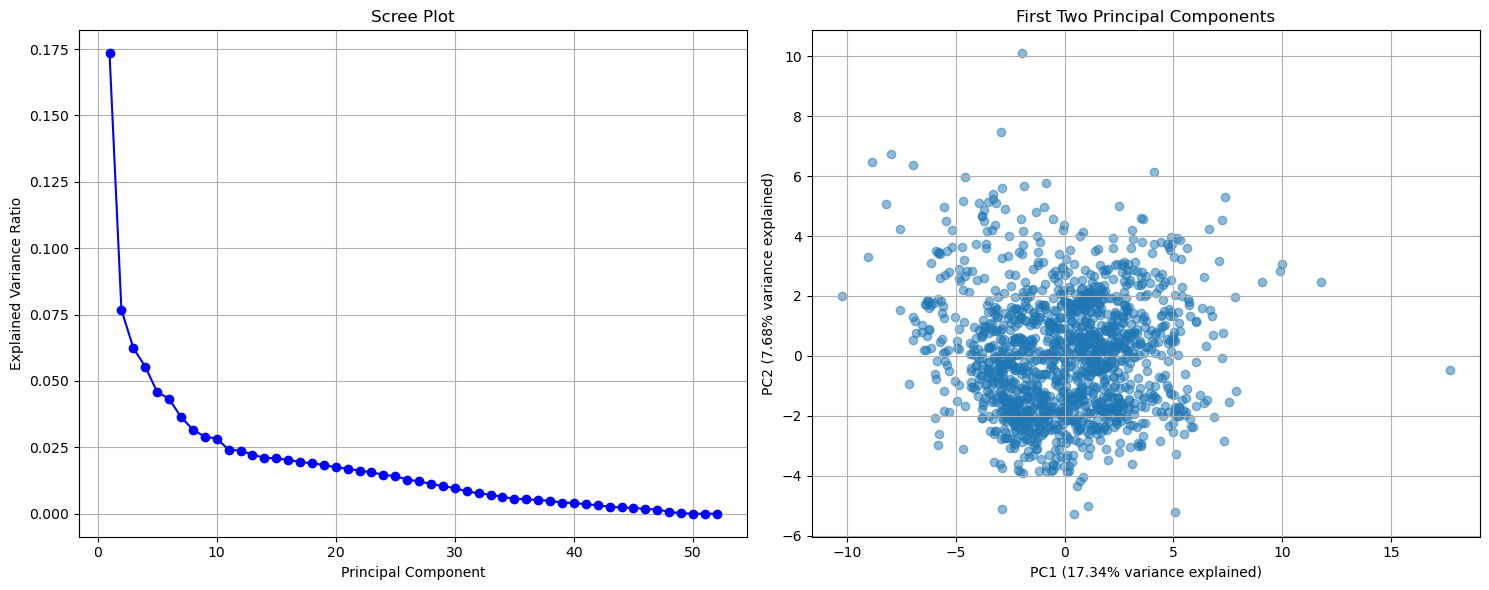


PCA Analysis Summary:
Number of features: 52
Number of components: 52

Explained variance ratio for first 5 components:
PC1: 0.1734 (17.34%)
PC2: 0.0768 (7.68%)
PC3: 0.0624 (6.24%)
PC4: 0.0554 (5.54%)
PC5: 0.0459 (4.59%)


In [12]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns


# Select numerical columns for PCA
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()


cols_to_exclude = ['Id', 'SalePrice']

numerical_cols = [col for col in numerical_cols if col not in cols_to_exclude]

# Create a subset of data with only numerical columns
X = df[numerical_cols].copy()

# Handle missing values
X = X.fillna(X.mean())

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Calculate explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Create a figure with two subplots side by side
plt.figure(figsize=(15, 6))

# Plot 1: Scree plot (explained variance ratio)
plt.subplot(1, 2, 1)
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, 'bo-')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.grid(True)

# Plot 2: First two principal components
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)
plt.xlabel(f'PC1 ({explained_variance_ratio[0]:.2%} variance explained)')
plt.ylabel(f'PC2 ({explained_variance_ratio[1]:.2%} variance explained)')
plt.title('First Two Principal Components')
plt.grid(True)

# Adjust layout and display
plt.tight_layout()
plt.show()

# Print summary of explained variance
print("\nPCA Analysis Summary:")
print(f"Number of features: {len(numerical_cols)}")
print(f"Number of components: {pca.n_components_}")
print("\nExplained variance ratio for first 5 components:")
for i, ratio in enumerate(explained_variance_ratio[:5]):
    print(f"PC{i+1}: {ratio:.4f} ({ratio:.2%})")



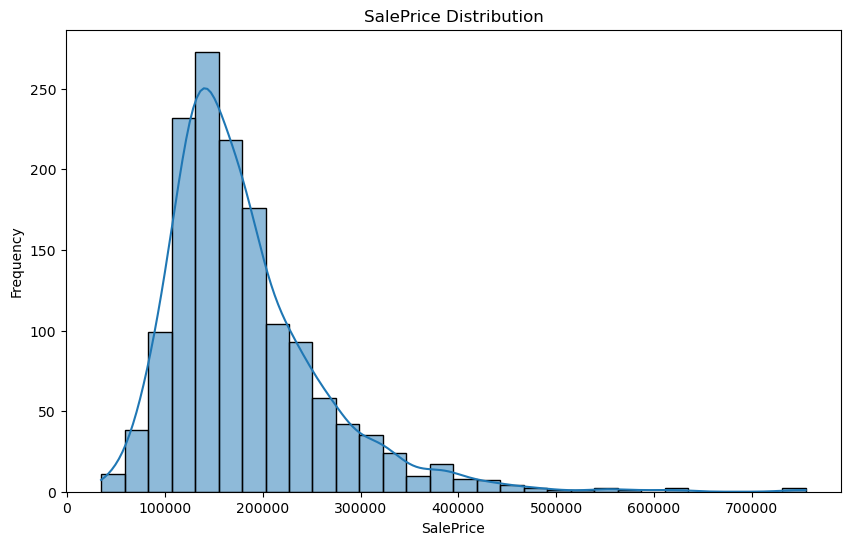

Skewness of SalePrice: 1.880940746034036


In [5]:
import seaborn as sns
from scipy.stats import skew
# Plot the distribution
plt.figure(figsize=(10,6))
sns.histplot(df['SalePrice'], kde=True, bins=30)
plt.title('SalePrice Distribution')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

# Print skewness
print("Skewness of SalePrice:", skew(df['SalePrice'].dropna()))

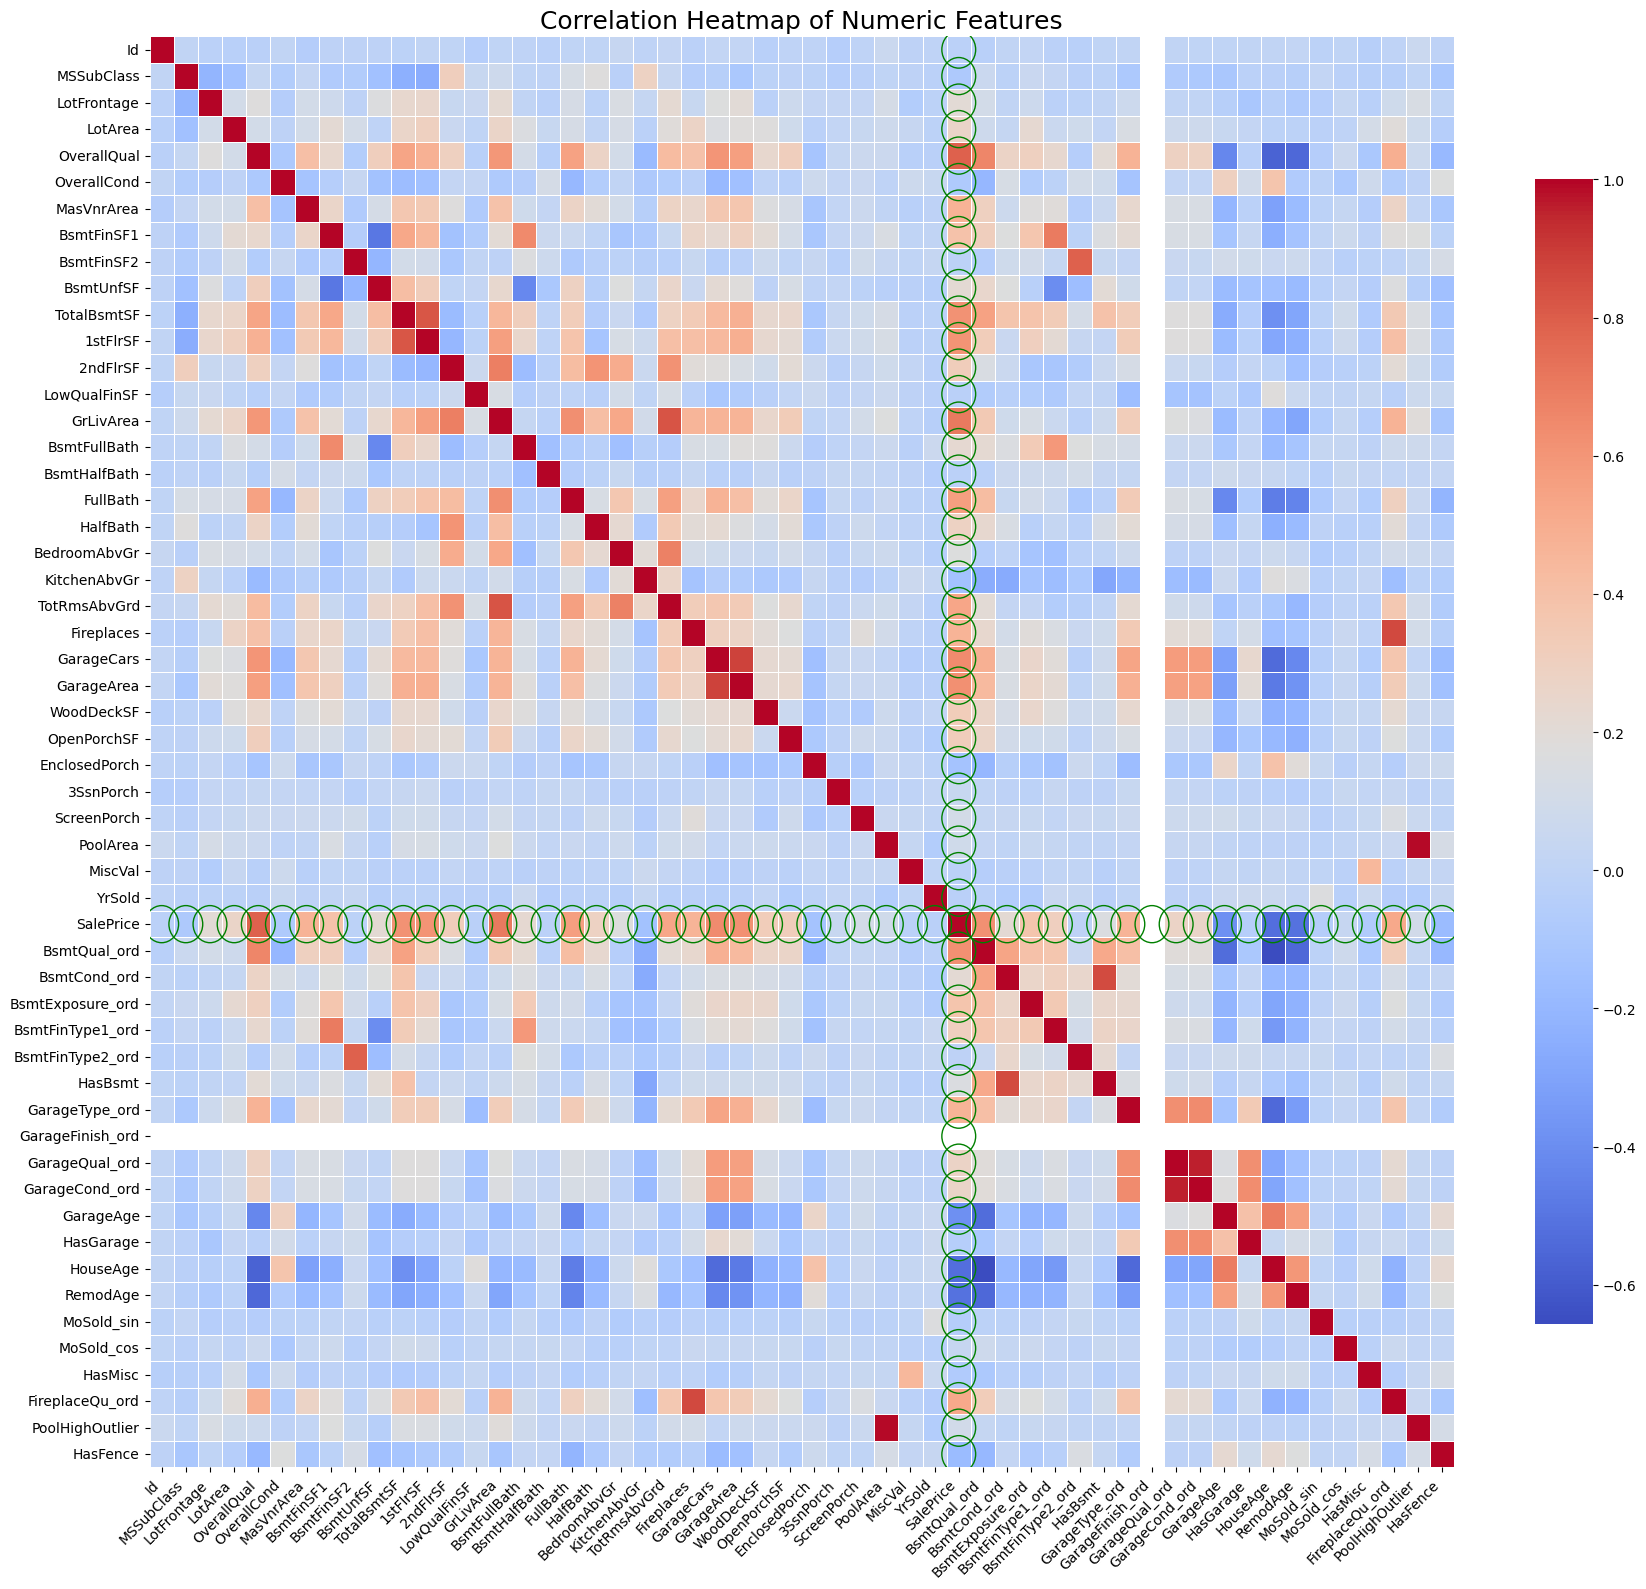

In [6]:
from matplotlib.patches import Circle
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])


# Compute correlation matrix
corr_matrix = numeric_df.corr()
fig, ax = plt.subplots(figsize=(18, 16))
sns.heatmap(
    corr_matrix, 
    cmap='coolwarm', 
    annot=False, 
    fmt=".2f", 
    linewidths=0.5,
    cbar_kws={"shrink": .8},
    ax=ax
)

plt.title('Correlation Heatmap of Numeric Features', fontsize=18)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

saleprice_idx = list(corr_matrix.columns).index('SalePrice')
n = len(corr_matrix)

# Lower thickness by setting linewidth=1
radius = 0.7
for i in range(n):
    # Circle in SalePrice column
    circle_col = Circle((saleprice_idx + 0.5, i + 0.5), radius, fill=False, edgecolor='green', linewidth=1)
    ax.add_patch(circle_col)
    # Circle in SalePrice row
    if i != saleprice_idx:
        circle_row = Circle((i + 0.5, saleprice_idx + 0.5), radius, fill=False, edgecolor='green', linewidth=1)
        ax.add_patch(circle_row)


plt.tight_layout()
plt.show()

In [9]:
train_data["GarageFinish_ord"]


0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
1455   NaN
1456   NaN
1457   NaN
1458   NaN
1459   NaN
Name: GarageFinish_ord, Length: 1460, dtype: float64

In [7]:
# Display correlations with SalePrice, sorted
saleprice_corr = corr_matrix['SalePrice'].sort_values(ascending=False)
saleprice_corr.head(11)

SalePrice          1.000000
OverallQual        0.790982
GrLivArea          0.708624
GarageCars         0.640409
GarageArea         0.623431
BsmtQual_ord       0.622925
TotalBsmtSF        0.613581
1stFlrSF           0.605852
FullBath           0.560664
TotRmsAbvGrd       0.533723
FireplaceQu_ord    0.520438
Name: SalePrice, dtype: float64

KeyError: 'YearBuilt'

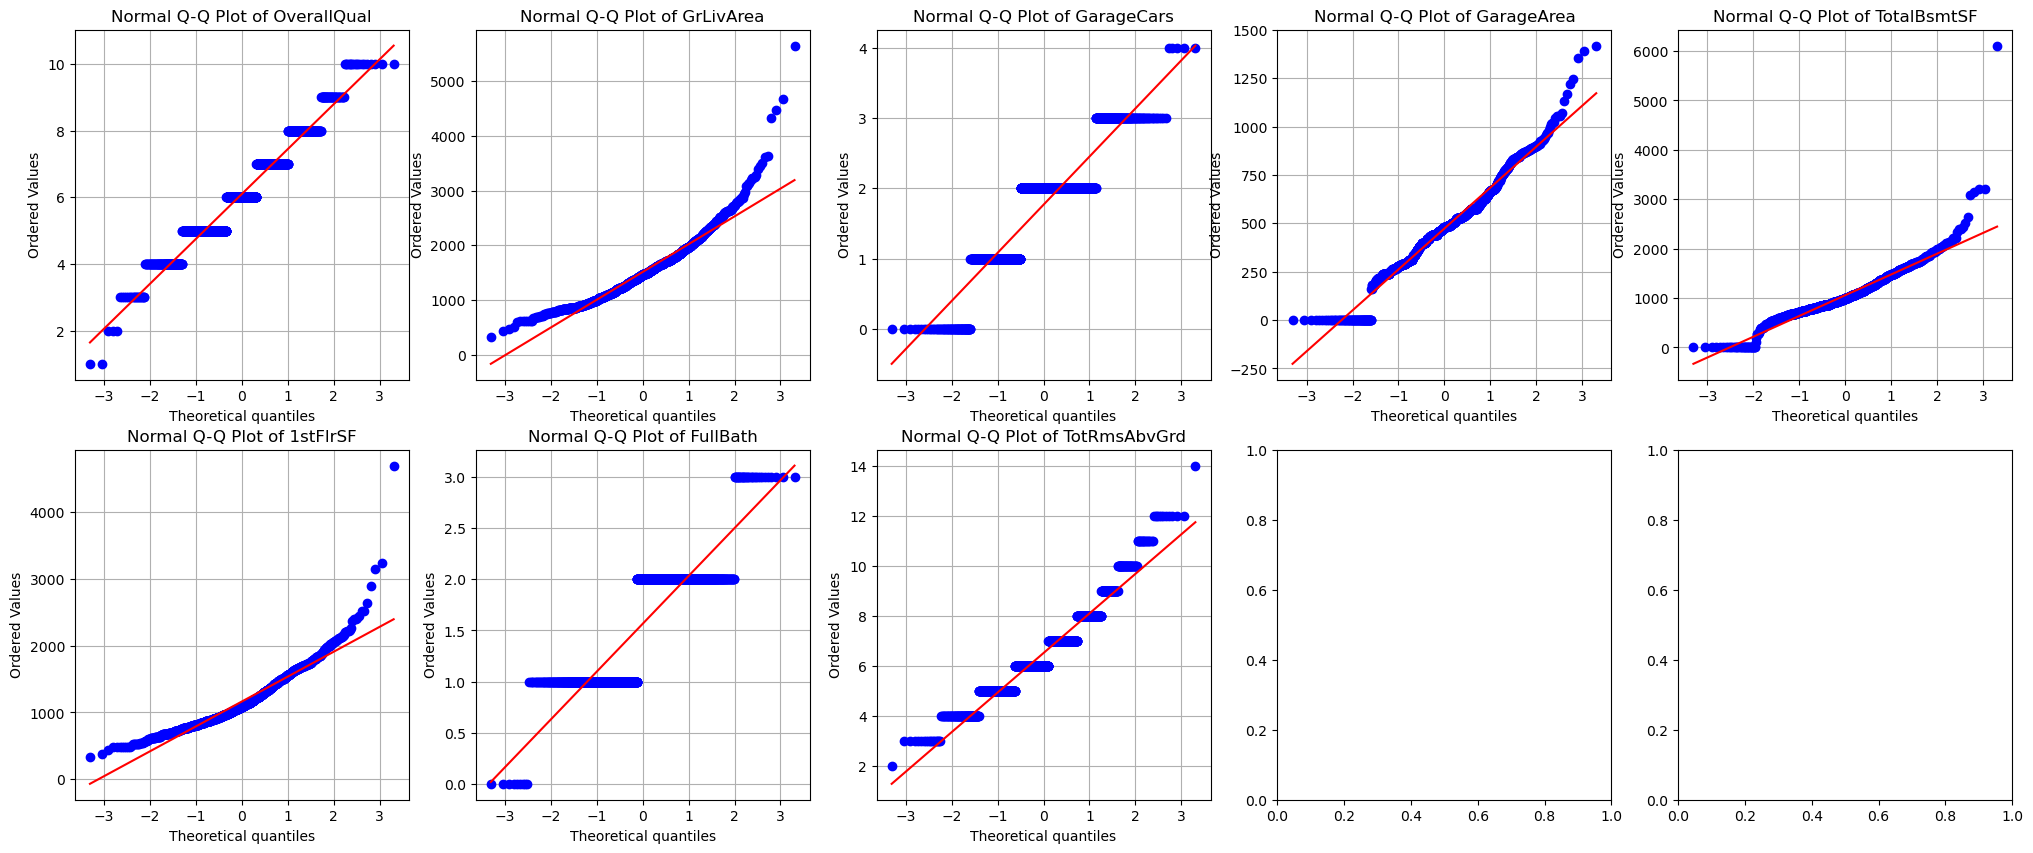

In [8]:

from scipy import stats
# List of top features
features = [
    'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF',
    '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd'
]

# Create a figure with subplots
fig, axes = plt.subplots(2, 5, figsize=(25, 10))
axes = axes.flatten()

# Create Q-Q plots for each feature
for i, feature in enumerate(features):
    ax = axes[i]
    
    # Create Q-Q plot
    stats.probplot(df[feature], dist="norm", plot=ax)
    
    # Customize the plot
    ax.set_title(f'Normal Q-Q Plot of {feature}')
    ax.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

# Print skewness for each feature
print("\nSkewness of features:")
for feature in features:
    skewness = df[feature].skew()
    print(f"{feature}: {skewness:.3f}")